In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
#bring in csv of spot rates
spot_rates = pd.read_csv("spot_rates.csv")
spot_rates.head()

list_of_rates = ['AUJPYSP', 'AUUSDSP', 'AUGBPSP', 'AUMYRSP', 'AUEU.SP', 'AUNZDSP']

In [3]:
#get doy-on-day log returns of spot prices output into data frame 
spot_returns = pd.DataFrame()
for x in list_of_rates:
    #percentage returns commented below 
    #spot_returns[x + '_pct_return'] = spot_rates[x].pct_change()
    spot_returns[x + '_log_return'] = np.log(spot_rates[x]).diff()
    
spot_returns.columns = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
spot_returns.head(10)

,JPY,USD,GBP,MYR,EUR,NZD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014596,0.005757,-0.007325,0.007630,0.021320,0.007832
2,0.030557,0.020315,0.031631,0.022749,0.019120,0.001161
3,0.012901,0.001826,-0.008994,0.008404,0.025635,0.009160
4,0.021336,0.013801,-0.003909,0.011506,0.016794,-0.007007
5,-0.036838,-0.023392,-0.035673,-0.013711,-0.032135,-0.004976
6,-0.011709,0.001982,-0.005570,0.005084,0.001159,-0.008097
7,-0.035811,-0.023036,-0.016461,-0.014722,-0.004062,-0.010955
8,-0.028511,-0.019438,0.001528,-0.017495,-0.015035,0.021376
9,-0.003642,-0.005772,0.009549,-0.008157,-0.000394,0.007684


In [4]:
#create covarience matrix 
cov_matrix = spot_returns.cov()
cov_matrix

,JPY,USD,GBP,MYR,EUR,NZD
JPY,0.000081,0.000048,0.000030,0.000030,0.000032,0.000009
USD,0.000048,0.000051,0.000030,0.000032,0.000027,0.000007
GBP,0.000030,0.000030,0.000044,0.000021,0.000026,0.000008
MYR,0.000030,0.000032,0.000021,0.000032,0.000020,0.000006
EUR,0.000032,0.000027,0.000026,0.000020,0.000039,0.000009
NZD,0.000009,0.000007,0.000008,0.000006,0.000009,0.000021


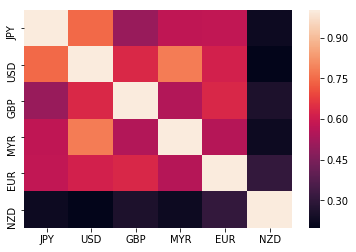

In [5]:
#correation matrix 
corr_matrix = spot_returns.corr()
corr_matrix

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns);

In [6]:
Portfolio = pd.read_csv("spot_portfolio.csv")

In [7]:
Portfolio

,Currency,AUD equvalents,ABS value,p_weight
0,USD,20,20,0.148148
1,GBP,-15,15,0.111111
2,EUR,25,25,0.185185
3,JPY,-30,30,0.222222
4,NZD,25,25,0.185185
5,MYR,-20,20,0.148148


In [8]:
X_Vector = [-30000000, 20000000, -15000000, -20000000, 25000000, 25000000]

Covar_X = cov_matrix.dot(X_Vector)

X_Covar_X = Covar_X.dot(X_Vector)

X_Covar_X

58545599277.80732

In [9]:
sqrt_covar = np.sqrt(X_Covar_X)
sqrt_covar*1.645

398027.4554421197

In [10]:
np.mean(spot_returns['JPY'])

5.569086119784732e-05

In [11]:
curr = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
mean_rets = {}
for x in curr:
    mean_rets[x] = np.mean(spot_returns[x])
    
mean_rets

{'JPY': 5.569086119784732e-05,
 'USD': -6.115685787646584e-06,
 'GBP': 5.774672615907859e-05,
 'MYR': 5.921647248838025e-05,
 'EUR': 8.077564935282384e-05,
 'NZD': -4.980751122065967e-05}

In [12]:
std_rets = {}
for x in curr:
    std_rets[x] = np.std(spot_returns[x])
    
std_rets

{'JPY': 0.009006444731635936,
 'USD': 0.007141994831460912,
 'GBP': 0.006652911018841816,
 'MYR': 0.005688550236269072,
 'EUR': 0.006215485106321001,
 'NZD': 0.00460082447983214}

In [13]:
np.random.seed(42)
n_sims = 100000
sim_returns = pd.DataFrame()
smean = {}
sim_std ={}

for x in curr:
    sim_returns[x] = np.random.normal(mean_rets[x], std_rets[x], n_sims)
    smean[x] = np.mean(sim_returns[x])
    sim_std[x] = np.std(sim_returns[x])

In [14]:
sim_returns.tail()

,JPY,USD,GBP,MYR,EUR,NZD
99995,-0.001973,-0.009038,-0.002818,-0.003095,0.008370,0.000459
99996,-0.005076,0.004034,-0.004516,-0.013118,-0.000601,-0.003658
99997,0.003741,0.001137,-0.004464,0.004790,-0.001434,-0.000738
99998,-0.001845,0.006105,-0.007075,0.002690,-0.004876,-0.000458
99999,0.001137,-0.007612,-0.002323,-0.000722,-0.010120,-0.000223


In [15]:
spot_price = {'JPY': 72.97, 'USD': 0.6812, 'GBP': 0.5625, 'MYR': 2.8290, 'EUR': 0.6148, 'NZD': 1.0419}
spot_price

{'JPY': 72.97,
 'USD': 0.6812,
 'GBP': 0.5625,
 'MYR': 2.829,
 'EUR': 0.6148,
 'NZD': 1.0419}

In [16]:
sim_spot_price = pd.DataFrame()
Curr_Vector = {'JPY':-30000000, 'USD':20000000, 'GBP':-15000000, 'MYR':-20000000, 'EUR':25000000, 'NZD':25000000}

for x in curr:
    sim_spot_price[x] = ((1 + sim_returns[x]) * Curr_Vector[x])

In [17]:
sim_spot_price['Portfolio'] = sim_spot_price['JPY'] + sim_spot_price['USD'] + sim_spot_price['GBP'] + sim_spot_price['MYR'] + sim_spot_price['EUR'] + sim_spot_price['NZD']

In [18]:
sim_spot_price['PnL'] = sim_spot_price['Portfolio'] - 5000000 #Mtm
sim_spot_price

,JPY,USD,GBP,MYR,EUR,NZD,Portfolio,PnL
0,-3.013588e+07,2.014709e+07,-1.515673e+07,-1.984193e+07,2.547369e+07,2.487649e+07,5.362725e+06,362725.443978
1,-2.996431e+07,1.983485e+07,-1.499146e+07,-2.006351e+07,2.497901e+07,2.490441e+07,4.698977e+06,-301023.428958
2,-3.017667e+07,2.008207e+07,-1.486819e+07,-1.998745e+07,2.473293e+07,2.507734e+07,4.860036e+06,-139963.944435
3,-3.041318e+07,1.991143e+07,-1.486229e+07,-1.996896e+07,2.508205e+07,2.504682e+07,4.795868e+06,-204131.882595
4,-2.993840e+07,1.995311e+07,-1.496667e+07,-2.008851e+07,2.499211e+07,2.504735e+07,4.998985e+06,-1014.743407
5,-2.993841e+07,2.000668e+07,-1.484314e+07,-1.995173e+07,2.502647e+07,2.494284e+07,5.242701e+06,242701.249331
6,-3.042836e+07,1.998281e+07,-1.505946e+07,-2.005326e+07,2.502569e+07,2.497511e+07,4.442527e+06,-557473.412234
7,-3.020903e+07,1.976046e+07,-1.502064e+07,-1.994518e+07,2.509844e+07,2.484941e+07,4.533465e+06,-466535.390017
8,-2.987482e+07,2.019726e+07,-1.500581e+07,-2.002966e+07,2.479995e+07,2.525177e+07,5.338694e+06,338694.017616
9,-3.014827e+07,2.016192e+07,-1.493906e+07,-1.991085e+07,2.516699e+07,2.514292e+07,5.473648e+06,473648.361311


In [19]:
PnL = np.array(sim_spot_price['PnL'])
PnL.sort()

In [20]:
PnL[5000]

-648506.6649415232

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


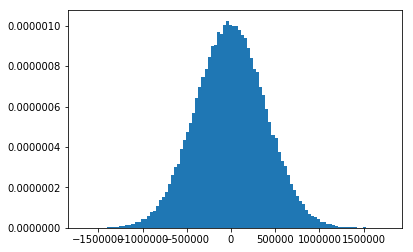

In [21]:
import matplotlib.pyplot as plt
x = PnL
plt.hist(x, normed=True, bins=100);

In [22]:
np.percentile(PnL, 5)

-648507.2484624723

In [23]:
hist_port_returns = pd.DataFrame()
for x in curr:
    hist_port_returns[x] = (1+spot_returns[x]) * Curr_Vector[x]
    
hist_port_returns.drop(hist_port_returns.index[0])
hist_port_returns

,JPY,USD,GBP,MYR,EUR,NZD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.043789e+07,2.011514e+07,-1.489013e+07,-2.015260e+07,2.553300e+07,2.519580e+07
2,-3.091671e+07,2.040629e+07,-1.547446e+07,-2.045498e+07,2.547799e+07,2.502903e+07
3,-3.038704e+07,2.003653e+07,-1.486508e+07,-2.016809e+07,2.564088e+07,2.522899e+07
4,-3.064008e+07,2.027602e+07,-1.494136e+07,-2.023012e+07,2.541986e+07,2.482484e+07
5,-2.889486e+07,1.953216e+07,-1.446490e+07,-1.972578e+07,2.419662e+07,2.487561e+07
6,-2.964874e+07,2.003964e+07,-1.491645e+07,-2.010168e+07,2.502897e+07,2.479759e+07
7,-2.892567e+07,1.953929e+07,-1.475308e+07,-1.970557e+07,2.489846e+07,2.472613e+07
8,-2.914468e+07,1.961124e+07,-1.502291e+07,-1.965010e+07,2.462413e+07,2.553441e+07
9,-2.989073e+07,1.988456e+07,-1.514323e+07,-1.983687e+07,2.499016e+07,2.519209e+07


In [24]:
hist_port_returns['Portfolio'] = hist_port_returns['JPY'] + hist_port_returns['USD'] + hist_port_returns['GBP'] + hist_port_returns['MYR'] + hist_port_returns['EUR'] + hist_port_returns['NZD']

In [25]:
hist_port_returns['PnL'] = hist_port_returns['Portfolio'] - 5000000

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


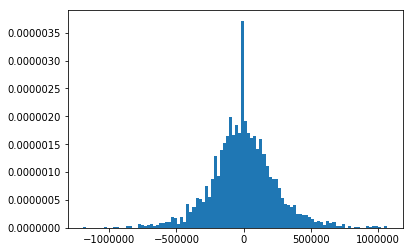

In [26]:
plt.hist(hist_port_returns['PnL'], normed=True, bins=100);

In [27]:
array = np.array(hist_port_returns['PnL'])

In [28]:
array = array[np.logical_not(np.isnan(array))]
np.percentile(array, 5)

-384873.90879832953

In [29]:
hist_port_returns['Log_returns'] = np.log(hist_port_returns['Portfolio']).diff()

In [30]:
hist_port_returns.loc[2: ,'Log_returns']

2      -0.276636
3       0.299286
4      -0.152726
5       0.158662
6      -0.059639
7       0.105798
8       0.029412
9      -0.135854
10      0.151894
11     -0.345819
12      0.045643
13      0.268281
14     -0.156638
15      0.001247
16      0.025626
17     -0.028682
18     -0.087589
19      0.130631
20      0.065314
21      0.046975
22     -0.037369
23     -0.240915
24      0.081820
25      0.124091
26     -0.127139
27     -0.168298
28      0.257185
29     -0.044429
30     -0.028686
31     -0.016163
          ...   
2732   -0.039495
2733    0.029181
2734   -0.040698
2735    0.006849
2736    0.049257
2737   -0.015131
2738    0.023873
2739    0.003594
2740   -0.030987
2741    0.026028
2742   -0.013933
2743   -0.017385
2744    0.013852
2745    0.018717
2746   -0.029332
2747    0.016812
2748   -0.023025
2749    0.011095
2750    0.017985
2751   -0.008036
2752   -0.019384
2753    0.032238
2754    0.026467
2755   -0.028627
2756   -0.029535
2757    0.022024
2758   -0.069410
2759    0.0828

In [31]:
hmean = np.mean(hist_port_returns.loc[2: ,'Log_returns'])
hstd = np.std(hist_port_returns.loc[2: ,'Log_returns'])
np.random.seed(42)
n_sims = 100000
hsim_returns = np.random.normal(hmean, hstd, n_sims)
hsmean  = np.mean(hsim_returns)
hsim_std = np.std(hsim_returns)

In [32]:
simVAR = 5000000*np.percentile(hsim_returns, 5) 
simVAR

-578217.0667840239

In [33]:
L = np.linalg.cholesky(cov_matrix)

In [34]:
L

array([[0.00900808, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00534655, 0.00473719, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00335038, 0.00258973, 0.00513279, 0.        , 0.        ,
        0.        ],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.        ,
        0.        ],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])